Importing Libraries


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 



Data Collection & Processing

In [2]:
#Loading the CSV Data to a Pandas Data Frame

gold_data = pd.read_csv('/gold_price_data.csv')


In [3]:
#print first 5 rows in the DataFrame

gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
#number of rows & columns

gold_data.shape

(2290, 6)

In [5]:
#getting some basic information about the data

gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
#Checking the number of missing values

gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
#Getting the Statistical Measures of the data

gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation

1. Postive
2. Negative

In [9]:
correlation = gold_data.corr()

<AxesSubplot:>

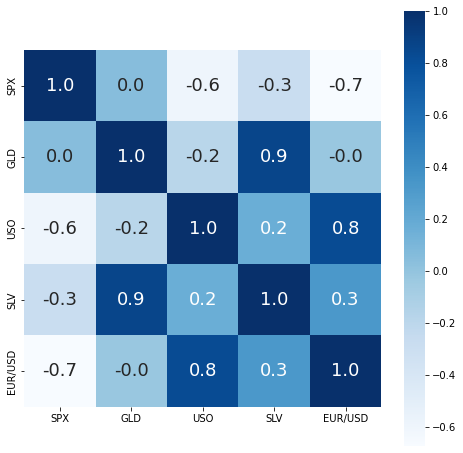

In [11]:
#Constructing a Heat Map to understand the Correlation

plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':18}, cmap='Blues')

In [12]:
#Correlation values of GLD

print((correlation['GLD']))

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

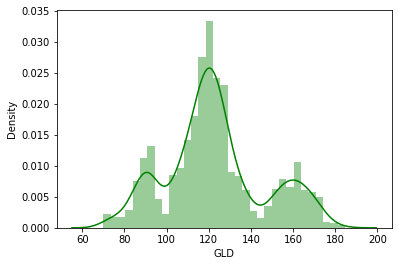

In [13]:
#Checking the distribution of the GLD Price

sns.distplot(gold_data['GLD'], color='green')

Splitting the Features & Target

In [14]:
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']

In [15]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [16]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training Data & Test Data

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

Model Training:

Random Forest Regressor

In [19]:
regressor = RandomForestRegressor(n_estimators=100)

In [20]:
#Training the mmodel
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [21]:
#Prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [22]:
print(test_data_prediction)

[168.60499984  82.05089996 115.83590005 127.66560056 120.82800114
 154.77559797 150.61509872 126.01800023 117.4308986  126.04750043
 116.7562012  172.24060089 141.47059865 167.82969873 115.24509964
 117.63890043 140.23920241 169.86630044 159.67150293 157.30380004
 154.9016001  125.35140011 176.76190043 157.36800371 125.28729994
  93.88599936  77.21810066 120.82089997 119.06439914 167.47669958
  88.06690039 125.40580013  91.13030066 117.77880024 121.09859955
 136.45840143 115.51340112 114.67920059 147.0510997  107.43430113
 104.37840226  87.27809801 126.51230076 117.72539993 152.30709934
 119.58259984 108.39829985 107.98819823  93.08050043 127.14129777
  74.32390097 113.73359937 121.38699989 111.29989865 118.80149896
 120.79739947 159.49939995 166.98410109 146.82239697  85.84539828
  94.47470043  86.78639864  90.54980002 118.81720063 126.45940029
 127.6849     169.90820036 122.19849932 117.39639892  98.73190007
 168.58950121 143.13539876 132.31980223 121.10900223 120.95829937
 119.68880

In [25]:
#R Squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared Error: ", error_score)

R Squared Error:  0.9892910689347033


Compare the Actual Values & the Predicted Values 

In [26]:
Y_test = list(Y_test)  

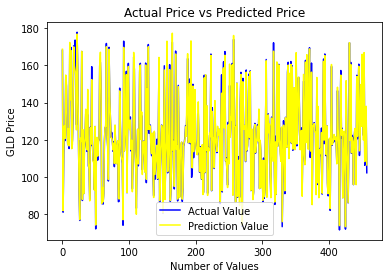

In [32]:
plt.plot(Y_test, color="blue", label='Actual Value')
plt.plot(test_data_prediction, color='yellow', label='Prediction Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()